In [334]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mn
from feature_engine.imputation import ArbitraryNumberImputer, MeanMedianImputer, CategoricalImputer

## Data

In [335]:
world_data = pd.read_csv('../data/owid-covid-data.csv')

In [336]:
pd.options.display.max_rows = 60
world_data.head(5).T

,0,1,2,3,4
iso_code,AFG,AFG,AFG,AFG,AFG
continent,Asia,Asia,Asia,Asia,Asia
location,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28
total_cases,1.000,1.000,1.000,1.000,1.000
new_cases,1.000,0.000,0.000,0.000,0.000
new_cases_smoothed,NaN,NaN,NaN,NaN,NaN
total_deaths,NaN,NaN,NaN,NaN,NaN
new_deaths,NaN,NaN,NaN,NaN,NaN
new_deaths_smoothed,NaN,NaN,NaN,NaN,NaN


In [337]:
with open('../data/case_data.json') as file:
    local_json_doc = json.load(file)

In [338]:
list(local_json_doc['data'].keys())

['daily_pcr_testing_data',
 'global_deaths',
 'global_new_cases',
 'global_new_deaths',
 'global_recovered',
 'global_total_cases',
 'hospital_data',
 'local_active_cases',
 'local_deaths',
 'local_new_cases',
 'local_new_deaths',
 'local_recovered',
 'local_total_cases',
 'local_total_number_of_individuals_in_hospitals',
 'total_pcr_testing_count',
 'update_date_time']

In [339]:
PCR_Testing = pd.DataFrame(data=local_json_doc['data']['daily_pcr_testing_data'],
                           columns=['count', 'date'])
PCR_Testing

,count,date
0,1,2020-02-18
1,0,2020-02-19
2,1,2020-02-20
3,0,2020-02-21
4,0,2020-02-22
...,...,...
451,24451,2021-05-14
452,22247,2021-05-15
453,27183,2021-05-16
454,26941,2021-05-17


In [340]:
Hospital_data = pd.DataFrame(data=local_json_doc['data']['hospital_data'])
Hospital_data

,created_at,cumulative_foreign,cumulative_local,cumulative_total,deleted_at,hospital,hospital_id,id,treatment_foreign,treatment_local,treatment_total,updated_at
0,2021-05-15 13:16:04,0,1403,1403,None,"{'created_at': '2020-04-11 08:45:06', 'deleted...",1,1,0,8,8,None
1,2021-05-15 13:16:04,0,4479,4479,None,"{'created_at': '2020-04-11 08:45:06', 'deleted...",2,2,0,155,155,None
2,2021-05-15 13:16:04,0,5100,5100,None,"{'created_at': '2020-04-11 08:45:06', 'deleted...",3,3,0,107,107,None
3,2021-05-15 13:16:04,0,1785,1785,None,"{'created_at': '2020-04-11 08:45:06', 'deleted...",4,4,0,85,85,None
4,2021-05-15 13:16:04,0,3213,3213,None,"{'created_at': '2020-04-11 08:45:06', 'deleted...",5,5,0,24,24,None
5,2021-05-15 13:16:04,0,3180,3180,None,"{'created_at': '2020-04-11 08:45:06', 'deleted...",6,6,0,98,98,None
6,2021-05-15 13:16:04,0,657,657,None,"{'created_at': '2020-04-11 08:45:06', 'deleted...",7,7,0,12,12,None
7,2021-05-15 13:16:04,0,2410,2410,None,"{'created_at': '2020-04-11 08:45:06', 'deleted...",8,8,0,38,38,None
8,2021-05-15 13:16:04,0,804,804,None,"{'created_at': '2020-04-11 08:45:06', 'deleted...",9,9,0,30,30,None
9,2021-05-15 13:16:04,0,1597,1597,None,"{'created_at': '2020-04-11 08:45:06', 'deleted...",10,10,0,63,63,None


In [341]:
hospital_extended = pd.DataFrame()

for index, row in Hospital_data.iterrows():
    hospital_extended = hospital_extended.append(row['hospital'], ignore_index=True)

In [342]:
hospital_extended

,created_at,deleted_at,id,name,name_si,name_ta,updated_at
0,2020-04-11 08:45:06,None,1.0,National Institute of Infectious Diseases,බෝවන රෝග පිළිබඳ ජාතික ආයතනය,தேசிய தொற்று நோயியல் நிறுவனம்,2020-04-11 08:45:06
1,2020-04-11 08:45:06,None,2.0,National Hospital Sri Lanka,ශ්‍රී ලංකා ජාතික රෝහල,இலங்கை தேசிய வைத்தியசாலை,2020-04-11 08:45:06
2,2020-04-11 08:45:06,None,3.0,TH - Ragama,ශික්ෂණ රෝහල - රාගම,போதனா வைத்தியசாலை - ராகம,2020-04-11 08:45:06
3,2020-04-11 08:45:06,None,4.0,TH - Karapitiya,ශික්ෂණ රෝහල - කරපිටිය,போதனா வைத்தியசாலை - கராபிடிய,2020-04-11 08:45:06
4,2020-04-11 08:45:06,None,5.0,TH - Anuradhapura,ශික්ෂණ රෝහල - අනුරාධපුර,போதனா வைத்தியசாலை - அனுராதபுரம்,2020-04-11 08:45:06
5,2020-04-11 08:45:06,None,6.0,TH - Kurunegala,ශික්ෂණ රෝහල - කුරුණගල,போதனா வைத்தியசாலை - குருநாகல்,2020-04-11 08:45:06
6,2020-04-11 08:45:06,None,7.0,TH- Jaffna,ශික්ෂණ රෝහල - යාපනය,போதனா வைத்தியசாலை - யாழ்ப்பாணம்,2020-04-11 08:45:06
7,2020-04-11 08:45:06,None,8.0,National Hospital Kandy,ජාතික රෝහල - මහනුවර,தேசிய வைத்தியசாலை கண்டி,2020-04-11 08:45:06
8,2020-04-11 08:45:06,None,9.0,TH – Batticaloa,ශික්ෂණ රෝහල - මඩකලපුව,போதனா வைத்தியசாலை - மட்டக்களப்பு,2020-04-11 08:45:06
9,2020-04-11 08:45:06,None,10.0,DGH- Gampaha,දිස්ත්‍රික් මහ රෝහල - ගම්පහ,மாவட்ட பொது வைத்தியசாலை - கம்பஹா,2020-04-11 08:45:06


In [343]:
district_data = pd.read_csv('../data/disdrict distribution.csv')
district_data.head(5)

,Date,AMPARA,ANURADHAPURA,BADULLA,BATTICOLOA,COLOMBO,GALLE,GAMPAHA,HAMBANTOTA,JAFFNA,...,MATALE,MATARA,MONERAGALA,MULLATIVU,NUWARAELIYA,POLONNARUWA,PUTTALAM,RATNAPURA,TRINCOMALEE,VAVUNIA
0,1-Apr-2020,0,0,1,1,32,1,11,0,1,...,0,1,0,0,0,0,25,3,0,0
1,2-Apr-2020,0,0,1,1,33,1,11,0,4,...,0,1,0,0,0,0,25,3,0,0
2,3-Apr-2020,0,0,1,1,36,1,11,0,4,...,0,1,0,0,0,0,25,3,0,0
3,4-Apr-2020,0,0,1,1,38,1,11,0,7,...,0,1,0,0,0,0,26,3,0,0
4,5-Apr-2020,0,0,1,1,42,1,11,0,7,...,0,1,0,0,0,0,27,3,0,0


In [344]:
daily_situation = pd.read_csv('../data/daily situation.csv')
daily_situation.head(5)

,Number inward as at yesterday-10 am,COVID 19 Positive - last 24H,Discharged from the hospital - last 24H,Number of deaths - last 24H,Number inward as at today-10 am,Date,Total Number Confirmed,Total Number Recovered,Total Number of Deaths
0,104,21,2,0,123,1-Apr-2020,143,18,2
1,123,5,3,1,124,2-Apr-2020,148,21,3
2,124,3,1,1,125,3-Apr-2020,151,22,4
3,125,8,3,1,129,4-Apr-2020,159,25,5
4,129,7,4,0,132,5-Apr-2020,166,29,5


In [345]:
clusters = pd.read_csv('../data/clusters.csv')
clusters.head(5)

,Date,Random and Returned from other countries,Navy Personal and their close contacts,Kandakadu cluster & their close contacts,Brandix Minuwangoda,3rd wave (new year)
0,1-May-2020,81,273,0,0,0
1,2-May-2020,83,296,0,0,0
2,3-May-2020,83,311,0,0,0
3,4-May-2020,83,324,0,0,0
4,5-May-2020,87,357,0,0,0


In [346]:
sl_full = world_data[world_data['location'] == 'Sri Lanka']
sl_full

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
76168,LKA,Asia,Sri Lanka,2020-01-27,1.0,1.0,NaN,NaN,NaN,NaN,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76169,LKA,Asia,Sri Lanka,2020-01-28,1.0,0.0,NaN,NaN,NaN,NaN,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76170,LKA,Asia,Sri Lanka,2020-01-29,1.0,0.0,NaN,NaN,NaN,NaN,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76171,LKA,Asia,Sri Lanka,2020-01-30,1.0,0.0,NaN,NaN,NaN,NaN,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76172,LKA,Asia,Sri Lanka,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76640,LKA,Asia,Sri Lanka,2021-05-13,135796.0,2269.0,2338.857,892.0,42.0,21.000,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76641,LKA,Asia,Sri Lanka,2021-05-14,138085.0,2289.0,2392.429,923.0,31.0,22.714,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76642,LKA,Asia,Sri Lanka,2021-05-15,140471.0,2386.0,2462.429,941.0,18.0,22.143,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76643,LKA,Asia,Sri Lanka,2021-05-16,142746.0,2275.0,2405.714,962.0,21.0,23.000,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782


In [347]:
sl_full.select_dtypes(include=np.number).columns

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccin

In [348]:
sl_full.select_dtypes(include=np.object).columns

Index(['iso_code', 'continent', 'location', 'date', 'tests_units'], dtype='object')

In [349]:
pattern = 'smoothed'
feat_drop = []

for feat_name in sl_full.select_dtypes(include=np.number).columns:
    if pattern in feat_name:
        feat_drop.append(feat_name)

feat_drop

['new_cases_smoothed',
 'new_deaths_smoothed',
 'new_cases_smoothed_per_million',
 'new_deaths_smoothed_per_million',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'new_vaccinations_smoothed',
 'new_vaccinations_smoothed_per_million']

In [350]:
sl_full.drop(feat_drop, axis=1, inplace=True)
sl_full.shape

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(477, 51)

In [351]:
sl_full.select_dtypes(include=np.number).isna().mean().sort_values(ascending=False)

hosp_patients                          1.000000
weekly_icu_admissions_per_million      1.000000
weekly_hosp_admissions_per_million     1.000000
weekly_hosp_admissions                 1.000000
icu_patients                           1.000000
icu_patients_per_million               1.000000
handwashing_facilities                 1.000000
hosp_patients_per_million              1.000000
weekly_icu_admissions                  1.000000
people_fully_vaccinated                0.964361
people_fully_vaccinated_per_hundred    0.964361
new_vaccinations                       0.849057
people_vaccinated                      0.828092
total_vaccinations_per_hundred         0.828092
total_vaccinations                     0.828092
people_vaccinated_per_hundred          0.828092
new_deaths_per_million                 0.127883
total_deaths_per_million               0.127883
new_deaths                             0.127883
total_deaths                           0.127883
reproduction_rate                      0

In [352]:
na_features = sl_full.columns[sl_full.isna().sum() > 0]
na_features

Index(['total_deaths', 'new_deaths', 'total_deaths_per_million',
       'new_deaths_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'stringency_index',
       'handwashing_facilities'],
      dtype='object')

In [353]:
sl_full['date']

76168    2020-01-27
76169    2020-01-28
76170    2020-01-29
76171    2020-01-30
76172    2020-01-31
            ...    
76640    2021-05-13
76641    2021-05-14
76642    2021-05-15
76643    2021-05-16
76644    2021-05-17
Name: date, Length: 477, dtype: object

In [354]:
sl_full['date'] = pd.to_datetime(sl_full['date'])
sl_full

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
76168,LKA,Asia,Sri Lanka,2020-01-27,1.0,1.0,NaN,NaN,0.047,0.047,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76169,LKA,Asia,Sri Lanka,2020-01-28,1.0,0.0,NaN,NaN,0.047,0.000,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76170,LKA,Asia,Sri Lanka,2020-01-29,1.0,0.0,NaN,NaN,0.047,0.000,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76171,LKA,Asia,Sri Lanka,2020-01-30,1.0,0.0,NaN,NaN,0.047,0.000,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76172,LKA,Asia,Sri Lanka,2020-01-31,1.0,0.0,NaN,NaN,0.047,0.000,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76640,LKA,Asia,Sri Lanka,2021-05-13,135796.0,2269.0,892.0,42.0,6341.681,105.962,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76641,LKA,Asia,Sri Lanka,2021-05-14,138085.0,2289.0,923.0,31.0,6448.577,106.896,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76642,LKA,Asia,Sri Lanka,2021-05-15,140471.0,2386.0,941.0,18.0,6560.004,111.426,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782
76643,LKA,Asia,Sri Lanka,2021-05-16,142746.0,2275.0,962.0,21.0,6666.246,106.243,...,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.6,76.98,0.782


In [355]:
np.min(sl_full['date']), np.max(sl_full['date'])

(Timestamp('2020-01-27 00:00:00'), Timestamp('2021-05-17 00:00:00'))

In [356]:
sl_full['month'] = sl_full['date'].dt.month
sl_full['year'] = sl_full['date'].dt.year

sl_full[['month', 'year']]

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month,year
76168,1,2020
76169,1,2020
76170,1,2020
76171,1,2020
76172,1,2020
...,...,...
76640,5,2021
76641,5,2021
76642,5,2021
76643,5,2021


group missing values to get clear idea about missing data (using year and month)

In [357]:
na_mask = sl_full.loc[:, :'human_development_index'].isna()
na_mask = pd.concat([na_mask, sl_full[['month', 'year']]], axis=1)
na_mask.groupby(by=['year', 'month'])[na_features].sum().style.background_gradient(cmap='YlOrRd')

- first local patient confirmed in 11th March 2020. most of the features can impute with 0 before that day.

In [358]:
sl_full.tests_units.value_counts()

tests performed    455
Name: tests_units, dtype: int64

In [359]:
cat_imputer = CategoricalImputer(fill_value='tests performed', variables=['tests_units'])
cat_imputer.fit(sl_full)
sl_full = cat_imputer.transform(sl_full)

sl_full['tests_units'].isna().sum()

0

In [360]:
sl_full.loc[76168:76211, na_features] = 0

In [361]:
na_mask = sl_full.loc[:, :'human_development_index'].isna()
na_mask = pd.concat([na_mask, sl_full[['month', 'year']]], axis=1)
na_mask.groupby(by=['year', 'month'])[na_features].sum().style.background_gradient(cmap='YlOrRd')

- arbittary imputation can be do on features with death values before 28th March, first death reported in 28th.

In [362]:
imputer_death = ArbitraryNumberImputer(arbitrary_number=0,
                                       variables=['total_deaths', 'new_deaths',
                                                  'total_deaths_per_million', 'new_deaths_per_million'])
imputer_death.fit(sl_full)
sl_full = imputer_death.transform(sl_full)
sl_full[['total_deaths', 'new_deaths', 'total_deaths_per_million', 'new_deaths_per_million']].isna().sum()

total_deaths                0
new_deaths                  0
total_deaths_per_million    0
new_deaths_per_million      0
dtype: int64

In [363]:
na_mask = sl_full.loc[:, :'human_development_index'].isna()
na_mask = pd.concat([na_mask, sl_full[['month', 'year']]], axis=1)
na_mask.groupby(by=['year', 'month'])[na_features].sum().style.background_gradient(cmap='YlOrRd')

- have to drop icu bed related feature because can't find data about icu beds.

In [364]:
icu_features = [feature for feature in na_features if 'icu' in feature]
sl_full.drop(icu_features, inplace=True, axis=1)
sl_full.shape

(477, 49)

In [365]:
na_mask = sl_full.loc[:, :'human_development_index'].isna()
na_mask = pd.concat([na_mask, sl_full[['month', 'year']]], axis=1)
na_mask.groupby(by=['year', 'month'])[sl_full.columns[sl_full.isna().sum() > 0]].sum().style.background_gradient(
    cmap='YlOrRd')

- hospital related data can imputed using daily situation data set

In [366]:
daily_situation

,Number inward as at yesterday-10 am,COVID 19 Positive - last 24H,Discharged from the hospital - last 24H,Number of deaths - last 24H,Number inward as at today-10 am,Date,Total Number Confirmed,Total Number Recovered,Total Number of Deaths
0,104,21,2,0,123,1-Apr-2020,143,18,2
1,123,5,3,1,124,2-Apr-2020,148,21,3
2,124,3,1,1,125,3-Apr-2020,151,22,4
3,125,8,3,1,129,4-Apr-2020,159,25,5
4,129,7,4,0,132,5-Apr-2020,166,29,5
...,...,...,...,...,...,...,...,...,...
407,23857,2269,1306,24,24796,14-May-2021,135796,110108,892
408,19036,2289,1352,29,19944,15-May-2021,138085,117220,921
409,19944,2386,1102,20,21208,16-May-2021,140471,118322,941
410,21208,2275,1307,21,22155,17-May-2021,142746,119629,962


In [367]:
daily_situation['Date'] = pd.to_datetime(daily_situation['Date'])
hospitalized_patients = np.abs(daily_situation['Number inward as at today-10 am'] - daily_situation[
    'Number inward as at yesterday-10 am'])
hospitalized_patients = pd.concat([daily_situation['Date'], hospitalized_patients], axis=1)
hospitalized_patients

,Date,0
0,2020-04-01,19
1,2020-04-02,1
2,2020-04-03,1
3,2020-04-04,4
4,2020-04-05,3
...,...,...
407,2021-05-14,939
408,2021-05-15,908
409,2021-05-16,1264
410,2021-05-17,947


In [368]:
# from mar 11 to apr 1
missing_values = [['3/11/2020', 19],
                  ['3/12/2020', 10],
                  ['3/13/2020', 35],
                  ['3/14/2020', 39],
                  ['3/15/2020', 30],
                  ['3/16/2020', 79],
                  ['3/17/2020', 1],
                  ['3/18/2020', 8],
                  ['3/19/2020', 31],
                  ['3/20/2020', 5],
                  ['3/21/2020', 12],
                  ['3/22/2020', 5],
                  ['3/23/2020', 5],
                  ['3/24/2020', 2],
                  ['3/25/2020', 16],
                  ['3/26/2020', 5],
                  ['3/27/2020', 1],
                  ['3/28/2020', 5],
                  ['3/29/2020', 13],
                  ['3/30/2020', 6],
                  ['3/31/2020', 69]
                  ]
missing_values = pd.DataFrame(missing_values, columns=['Date', 'count'])
missing_values

,Date,count
0,3/11/2020,19
1,3/12/2020,10
2,3/13/2020,35
3,3/14/2020,39
4,3/15/2020,30
5,3/16/2020,79
6,3/17/2020,1
7,3/18/2020,8
8,3/19/2020,31
9,3/20/2020,5


In [369]:
hospitalized_patients.rename(columns={0: 'count'}, inplace=True)
missing_values['Date'] = pd.to_datetime(missing_values['Date'])
hospitalized_patients_c = missing_values.append(hospitalized_patients, ignore_index=True)
hospitalized_patients_c = hospitalized_patients_c.set_index('Date')
hospitalized_patients_c

,count
Date,
2020-03-11,19
2020-03-12,10
2020-03-13,35
2020-03-14,39
2020-03-15,30
...,...
2021-05-14,939
2021-05-15,908
2021-05-16,1264


In [370]:

impute_with = hospitalized_patients_c['count'].to_dict()
replace_with = sl_full.date.map(impute_with)
sl_full['hosp_patients'] = np.where(sl_full['hosp_patients'].isna(), replace_with, sl_full['hosp_patients'])
sl_full['hosp_patients']

76168       0.0
76169       0.0
76170       0.0
76171       0.0
76172       0.0
          ...  
76640    1266.0
76641     939.0
76642     908.0
76643    1264.0
76644     947.0
Name: hosp_patients, Length: 477, dtype: float64

In [371]:
imputer_hosp = MeanMedianImputer(imputation_method='mean', variables=['hosp_patients'])
imputer_hosp.fit(sl_full)
sl_full = imputer_hosp.transform(sl_full)
sl_full['hosp_patients'].isna().sum()

0

In [372]:
sl_full = sl_full.drop(['weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'], axis=1)
sl_full.shape

(477, 47)

In [373]:
sl_full['hosp_patients_per_million'] = (sl_full['hosp_patients'] * 1000000) / sl_full['population']
sl_full['hosp_patients_per_million'].isna().sum()

0

In [374]:
na_mask = sl_full.loc[:, :'human_development_index'].isna()
na_mask = pd.concat([na_mask, sl_full[['month', 'year']]], axis=1)
na_mask.groupby(by=['year', 'month'])[sl_full.columns[sl_full.isna().sum() > 0]].sum().style.background_gradient(
    cmap='YlOrRd')

In [375]:
sl_full['reproduction_rate'].fillna(method='ffill', inplace=True)
sl_full['reproduction_rate'].isna().sum()

0

In [376]:
sl_full['positive_rate'].fillna(method='ffill', inplace=True)
sl_full['tests_per_case'].fillna(method='ffill', inplace=True)
sl_full['stringency_index'].fillna(method='ffill', inplace=True)
sl_full[['positive_rate', 'tests_per_case', 'stringency_index']].isna().sum()

positive_rate       0
tests_per_case      0
stringency_index    0
dtype: int64

In [377]:
vaccine_feat = [feature for feature in na_features if 'vaccin' in feature]
vaccine_feat

['total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'new_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred']

In [378]:
pd.options.display.max_rows = 137
sl_full[sl_full['date'] > '2020-12-31'][vaccine_feat]

,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
76508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76517,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- fill nas using forward fill for vaccination detailed features

In [379]:
for feat in vaccine_feat:
    sl_full[feat].fillna(method='ffill', inplace=True)

sl_full[vaccine_feat].isna().sum()

total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
new_vaccinations                       0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
dtype: int64

In [381]:
sl_full[vaccine_feat]

,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
76168,0.0,0.0,0.0,0.0,0.00,0.00,0.00
76169,0.0,0.0,0.0,0.0,0.00,0.00,0.00
76170,0.0,0.0,0.0,0.0,0.00,0.00,0.00
76171,0.0,0.0,0.0,0.0,0.00,0.00,0.00
76172,0.0,0.0,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...
76640,1309840.0,1075848.0,233992.0,89592.0,6.12,5.02,1.09
76641,1384079.0,1140122.0,243957.0,74239.0,6.46,5.32,1.14
76642,1384079.0,1140122.0,243957.0,74239.0,6.46,5.32,1.14
76643,1541761.0,1273861.0,267900.0,74239.0,7.20,5.95,1.25


In [380]:
na_mask = sl_full.loc[:, :'human_development_index'].isna()
na_mask = pd.concat([na_mask, sl_full[['month', 'year']]], axis=1)
na_mask.groupby(by=['year', 'month'])[sl_full.columns[sl_full.isna().sum() > 0]].sum().style.background_gradient(
    cmap='YlOrRd')

In [383]:
sl_full.drop('handwashing_facilities', inplace=True, axis=1)
sl_full.shape

(477, 46)

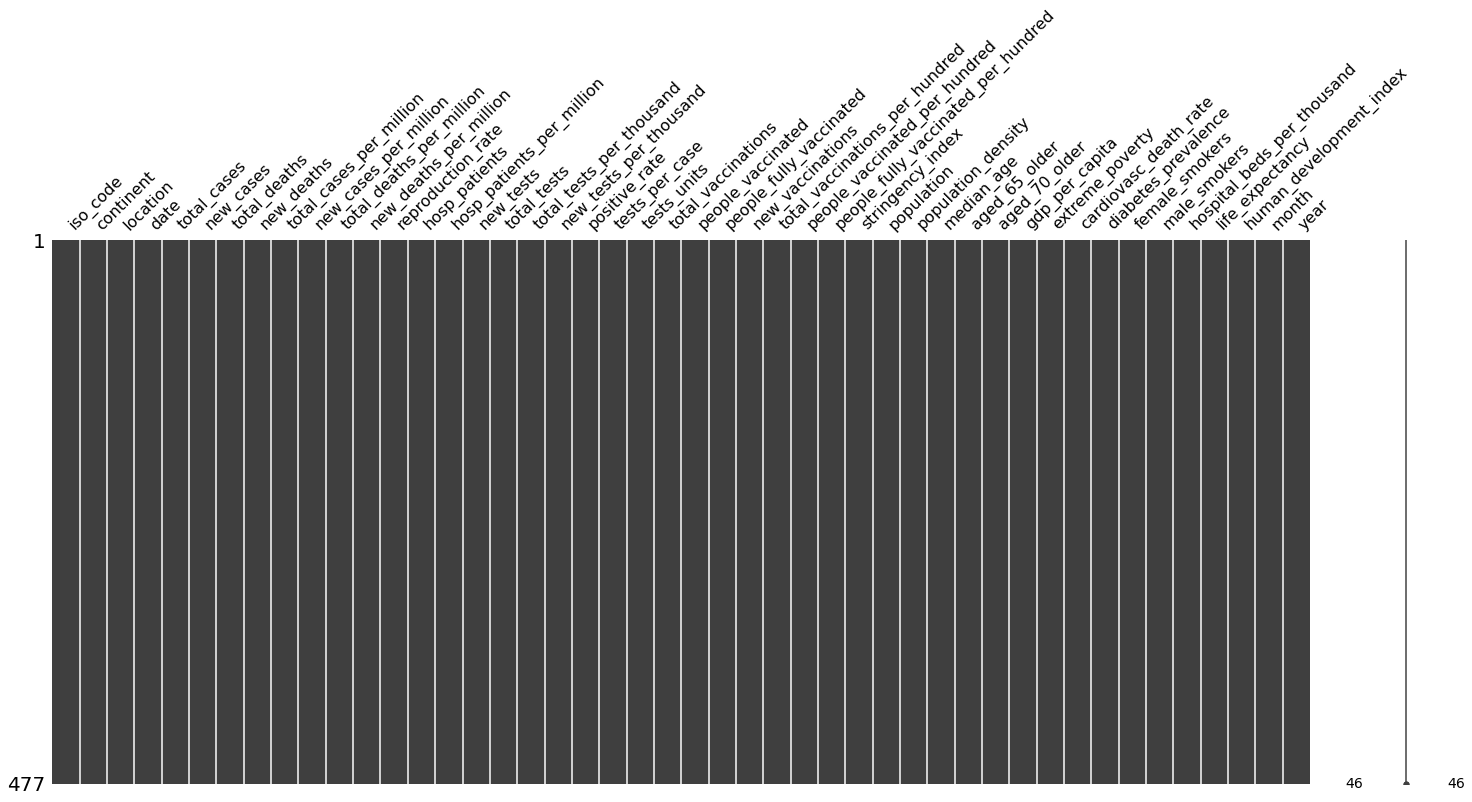

In [385]:
mn.matrix(sl_full)

In [386]:
pd.to_pickle(sl_full,'../data/sl_full_cleaned.pkl')